<a href="https://colab.research.google.com/github/sam505/Machine_Learning/blob/master/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment (60 pts + 10 pts Extra Credit) ##

**You should update the path below**

import pandas as pd
<br>
pathSuperstore = r'C:\Users\f_sohnoume\OneDrive - UNCG\f_sohnoume (faculty)\Spring 2021\ISM210\Resources\Week 8\Sample - Superstore.xlsx'
<br>
superstoreData = pd.read_excel(pathSuperstore)


Using superstoreData:
* Create the count, mean, standard deviation (std), minimun (min), and maximum (max) of the sales and profits for region in each year (10 pts)
    * Your output should be similar to the following. Instead of state, you should have region
    ![pi.PNG](attachment:pi.PNG)
* Create a pie chart illustrate the total sales per region (10 pts)
    * The pie chart will have 4 slices representing the 4 regions
    * The total sales will correspond to the size of the slices
* Return the top 3 orders in each region based on the total sales (10 pts)
    * You can use a user-defined function following the lecture notes
* Return the top 3 orders in each region in 2018 based on the **highest** total sales (10 pts)
    * You can use an user-defined function following the lecture notes
* Create a column called "Shipping Time" representing the number of days between the Order Date and the Ship Date (5 pts)
    * The difference between two *datetime64* type variables returns a *timedelta* type variable
    * You can use **dt.days** to convert a *timedelta* to the number of days. Also, you can use Google search to see how to convert a *timedelta* to an *int*. Here is an example https://www.kite.com/python/answers/how-to-convert-a-timedelta-column-in-a-pandas-dataframe-to-a-days-column-in-python
* Calculate the correlation between "Shipping Time" and Sales (5 pts)
    * You can look at previous lecture notes if you forgot how to compute correlations.
* Return the top 3 orders in each region in 2018 based on the **lowest** total "Shipping Time" (10 pts)
    * You can use an user-defined function following the lecture notes
* Plot the total profit per region and year of order date (10 pts)
    * year of order date goes in the x axis, total profit goes in the y axis, and region is the color
    * You can use seaborn to create the plot


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pathSuperstore = r'/content/Sample - Superstore.xlsx'
superstoreData = pd.read_excel(pathSuperstore)
superstoreData

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,EmployeeID
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,5
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,9
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,4
9990,9991,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,4
9991,9992,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,3
9992,9993,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,3


#Create the count, mean, standard deviation (std), minimun (min), and maximum (max) of the sales and profits for region in each year (10 pts)
##Your output should be similar to the following. Instead of state, you should have region pi.PNG

In [ ]:
superstoreDataAGGSRegion = superstoreData.groupby(['Region'])
superstoreDataAGGSRegion.agg(['count','mean','std','min','max'])[['Sales','Profit']]

Sales                          ...      Profit                      
        count        mean         std  ...         std        min        max
Region                                 ...                                  
Central  2323  215.772661  632.779010  ...  291.487465 -3701.8928  8399.9760
East     2848  238.336110  620.712652  ...  251.605084 -6599.9780  5039.9856
South    1620  241.803645  774.796273  ...  212.893088 -3839.9904  3177.4750
West     3203  226.493233  524.876877  ...  174.109081 -3399.9800  6719.9808

[4 rows x 10 columns]

# Create a pie chart illustrate the total sales per region (10 pts)
## The pie chart will have 4 slices representing the 4 regions
##The total sales will correspond to the size of the slices

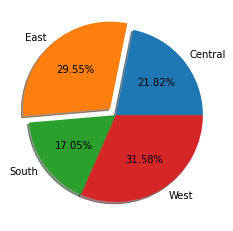

In [ ]:
superstoreDataRegionsSum = superstoreDataAGGSRegion.sum()
y = superstoreDataRegionsSum.Sales
labels = superstoreDataRegionsSum.index

plt.pie(y,labels=labels,autopct='%1.2f%%',shadow=True,explode=[0,0.1,0,0])
plt.show()

# Return the top 3 orders in each region based on the total sales (10 pts)
## You can use a user-defined function following the lecture notes

In [ ]:
def top(df, column, n=3):
  return df.sort_values(by=column)[-n:]

superstoreDataAGGSRegion.apply(top, column='Sales', n=3)

Row ID        Order ID  ...     Profit EmployeeID
Region                                ...                      
Central 4098    4099  CA-2015-116904  ...  4630.4755          3
        9039    9040  CA-2017-117121  ...  4946.3700          5
        6826    6827  CA-2017-118689  ...  8399.9760          8
East    4277    4278  US-2017-107440  ...  2365.9818          7
        4190    4191  CA-2018-166709  ...  5039.9856          9
        2623    2624  CA-2018-127180  ...  3919.9888          7
South   683      684  US-2018-168116  ... -3839.9904          5
        8488    8489  CA-2017-158841  ...  2799.9840          7
        2697    2698  CA-2015-145317  ... -1811.0784          4
West    8858    8859  CA-2018-135909  ...  1906.4850          1
        2505    2506  CA-2015-143917  ...   327.5060          7
        8153    8154  CA-2018-140151  ...  6719.9808          8

[12 rows x 21 columns]

# Return the top 3 orders in each region in 2018 based on the highest total sales (10 pts)
## You can use an user-defined function following the lecture notes

In [ ]:
superstoreDataAGGYearly = superstoreData.groupby(superstoreData['Order Date'].astype("datetime64[Y]"))
top_df = superstoreDataAGGYearly.apply(top, column='Sales', n=3)
top_df = top_df.rename_axis(index={'Order Date': 'Year_Order_Date'})
top_df = top_df.reset_index()
top_df[top_df['Year_Order_Date']==np.datetime64('2018', 'Y')]

,Year_Order_Date,level_1,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,EmployeeID
9,2018-01-01,4190,4191,CA-2018-166709,2018-11-17,2018-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,9
10,2018-01-01,2623,2624,CA-2018-127180,2018-10-22,2018-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,7
11,2018-01-01,8153,8154,CA-2018-140151,2018-03-23,2018-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115.0,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,8


#Create a column called "Shipping Time" representing the number of days between the Order Date and the Ship Date (5 pts)
##The difference between two datetime64 type variables returns a timedelta type variable
##You can use dt.days to convert a timedelta to the number of days. Also, you can use Google search to see how to convert a timedelta to an int. Here is an example https://www.kite.com/python/answers/how-to-convert-a-timedelta-column-in-a-pandas-dataframe-to-a-days-column-in-python

In [ ]:
superstoreData['Shipping Time'] = (superstoreData["Ship Date"]-superstoreData["Order Date"]).dt.days

# Calculate the correlation between "Shipping Time" and Sales (5 pts)
##You can look at previous lecture notes if you forgot how to compute correlations.

In [ ]:
column_1 = superstoreData["Shipping Time"]
column_2 = superstoreData["Sales"]
correlation = column_1.corr(column_2)
correlation

-0.0072848461872164925

#Return the top 3 orders in each region in 2018 based on the lowest total "Shipping Time" (10 pts)
##You can use an user-defined function following the lecture notes

In [ ]:
def top(df, column, n=5):
    return df.sort_values(by=column)[:n]

In [ ]:
superstoreDataAGGSRegion = superstoreData.groupby(['Region'])
superstoreDataAGGSRegion.apply(top, column='Shipping Time', n=3)

Row ID        Order ID  ... EmployeeID Shipping Time
Region                                ...                         
Central 4696    4697  US-2016-138121  ...          1             0
        8261    8262  CA-2017-118101  ...          2             0
        8571    8572  CA-2017-162222  ...          7             0
East    9570    9571  CA-2016-113131  ...          8             0
        4034    4035  US-2017-108777  ...          3             0
        9206    9207  CA-2017-146423  ...          2             0
South   8238    8239  CA-2018-103065  ...          1             0
        8239    8240  CA-2018-103065  ...          7             0
        8240    8241  CA-2018-103065  ...          7             0
West    814      815  CA-2018-143686  ...          7             0
        3569    3570  CA-2018-168109  ...          4             0
        3568    3569  CA-2018-168109  ...          5             0

[12 rows x 23 columns]

#Plot the total profit per region and year of order date (10 pts)
##year of order date goes in the x axis, total profit goes in the y axis, and region is the color
##You can use seaborn to create the plot

In [ ]:
superstoreDataAGGRegionYearly = superstoreData.groupby(['Region',superstoreData['Order Date'].astype("datetime64[Y]")])

[Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018')]

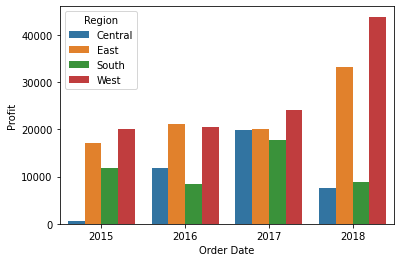

In [ ]:
totalAGG = superstoreDataAGGRegionYearly.sum().reset_index()

g = sns.barplot(data=totalAGG, x='Order Date',  y='Profit',  hue='Region')

g.set_xticklabels(totalAGG['Order Date'].values.astype("datetime64[Y]"))